Visualizes the data from Davies, 2013, read from a netcdf file created for reading into a climate model.

Data in netcdf files is recored in units of Watts/m2 (Watts per square meter) but note that the ascii data files were in mW/m2 (milliwatts per square meter).

## References

Davies, J. Huw, 2013: Global map of solid Earth surface heat flow. Geochemistry, Geophysics, Geosystems, 14 (10), pp 4608--4622.
[doi:10.1002/ggge.20271](http://dx.doi.org/10.1002/ggge.20271)


In [1]:
import numpy
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!make

md5sum -c md5sums.txt
ggge20271-sup-0003-Data_Table1_Eq_lon_lat_Global_HF.csv: OK
ggge20271-sup-0003-Data_Table1_Eq_lon_lat_Global_HF.nc: OK


In [3]:
rg = netCDF4.Dataset('ggge20271-sup-0003-Data_Table1_Eq_lon_lat_Global_HF.nc')
lon_edge, lat_edge = rg.variables['lonbnd'][:,0], rg.variables['latbnd'][:,0]
lon_edge = numpy.append(lon_edge,rg.variables['lonbnd'][-1,1])
lat_edge = numpy.append(lat_edge,rg.variables['latbnd'][-1,1])

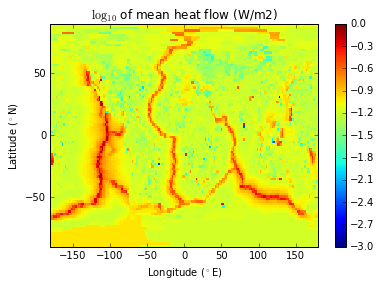

In [4]:
plt.pcolormesh(lon_edge, lat_edge, numpy.log10(rg.variables['mean_HF'][:]) );
plt.xlim((-180,180)); plt.xlabel('Longitude ($^\circ$E)');
plt.ylim((-90,90)); plt.ylabel('Latitude ($^\circ$N)');
plt.title('$\log_{10}$ of mean heat flow (W/m2)')
plt.clim(-3,0); plt.colorbar();

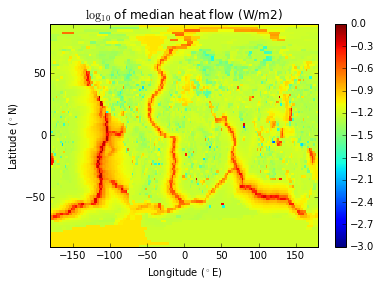

In [5]:
plt.pcolormesh(lon_edge, lat_edge, numpy.log10(rg.variables['median_HF'][:]) );
plt.xlim((-180,180)); plt.xlabel('Longitude ($^\circ$E)');
plt.ylim((-90,90)); plt.ylabel('Latitude ($^\circ$N)');
plt.title('$\log_{10}$ of median heat flow (W/m2)')
plt.clim(-3,0); plt.colorbar();

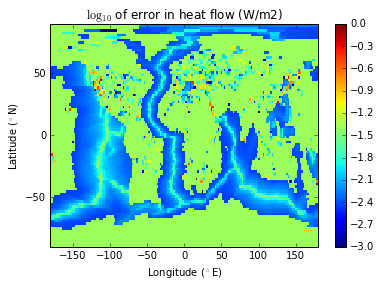

In [6]:
plt.pcolormesh(lon_edge, lat_edge, numpy.log10(rg.variables['error_HF'][:]) );
plt.xlim((-180,180)); plt.xlabel('Longitude ($^\circ$E)');
plt.ylim((-90,90)); plt.ylabel('Latitude ($^\circ$N)');
plt.title('$\log_{10}$ of error in heat flow (W/m2)')
plt.clim(-3,0); plt.colorbar();

In [7]:
deg2pi = numpy.pi / 180.
wght = ( numpy.sin(deg2pi * lat_edge[1:]) - numpy.sin(deg2pi * lat_edge[:-1]) ) /2
print('Global average HF =',(rg.variables['mean_HF'][:,:].mean(axis=1)*wght).sum(),'W/m2')

Global average HF = 0.085924 W/m2
